*Exercise*: Your goal is to use the simulated event file (```mumu_eta0mumu.lhe```), and following the method described below for the transverse momentum of a muon, to calculate the invariant mass of muon pairs through all the events.

The code provides a lot of automation. I added comments below to help you understand what is happening.

You don't need to modify anything in the next block of code. It simply selects the given input file.

In [1]:
# import module for reading LHE files:
from LHEReader import *

###########################################################
# Handle the input here. 
# The default output file tag (i.e. extension) is 'output'.
###########################################################


# the input file names:
inputfile = 'unweighted_events.lhe'

# output filename tag
outputfiletag = ''

The next block of code defines the analysis function. In this case, the function:

```analyze(events, weights)```

takes all the events as input through the ```events``` list and examines them, by looping through all the particles in each event, to perform various actions. Do not worry about the ```weight``` input at this point, this is simply a list of 1.0's.

See below in the code on instructions on how to add the di-muon invariant mass.

In [2]:
############################################################
# Define your ANALYSIS function here!
# The example looks for the new particle with pdg id "13", i.e. a muon
# and calculates its transverse momentum.
# For each observable we wish to return, we must add it to
# the dictionary "output_dictionary" as in the example below.
#############################################################
def analyze(events, weights):
    # a dictionary that contains the arrays that we wish to plot
    output_dictionary = {}
    # construct the observables by putting emtpy arrays into the dictionary
    # here, we have defined an empty entry into the dictionary, which we call pt, which corresponds to an empty list: []
    output_dictionary['pt'] = []
    # EXERCISE: To *ADD* an obserbable, you simply need to define a new "empty" entry in the dictionary, e.g. output_dictionary['minv'] = []
    # DO THIS HERE:
    output_dictionary['minv']=[]


    # In the given example, the transverse momentum of either a muon or anti-muon is calculated. 
    # in our case, we would need to find the muon and the anti-muon in each event, and save them. 
    # then, at the end of the loop for each event, we will use the two saved particles to calculate their invariant mass
    # Note the p entry in particles has the form: 
    # p[0]: the id of the particle. In our case, 13 for a muon, -13 for an anti-muon
    # p[1]: the status code of the particle (don't worry about this right now)
    # p[2], p[3], p[4]: the px, py, pz of the particle
    # p[5]: the energy of the particle
    # p[6]: the mass of the particle
    
    # loop over the events:
    for iev, particles in tqdm(enumerate(events)):
        # EXERCISE: first define an empty list of muons (and anti-muons): e.g. muons = []
        muons = []
        # loop over the particles in the event:
        for p in particles:
            if abs(p[0])==13: # found a muon or anti-muon
                pt = math.sqrt(p[2]**2 + p[3]**2) # this is the transverse momentum, calculated for the *current event*
                output_dictionary['pt'].append(pt) # then added to the appropriate entry in the dictionary
                # EXERCISE: "append" the found muon, represented by p into "muons" e.g. muons.append(p)
                muons.append(p)
                    
        # EXERCISE: after the loop over particles has ended, you should have a muon and an anti-muon in "muons".
        # use the two entries below to calculate their pair invariant mass, as we discussed in the hand-written notes:
        # remember, e.g. the px component of the first muon would be muons[0][2], e.g. the energy component of the second muon would be muons[1][5] and so on.
        # minv = ...
        minv = math.sqrt(((muons[0][5] + muons[1][5])**2) - ((muons[0][2] + muons[1][2])**2 + (muons[0][3]+muons[1][3])**2 + (muons[0][4]+muons[1][4])**2))

        # then push the minv into the appropriate dictionary entry that you have defined above:
        # output_dictionary['minv'].append(minv)
        output_dictionary['minv'].append(minv)
        
    return output_dictionary




At this point, you should have analysis code that works! All we need to do now is plot things. 

Follow the instructions below to see how to do this. 

Reading unweighted_events.lhe


10000it [00:00, 268020.35it/s]


---
plotting pt
saving the figure
output in pt.pdf


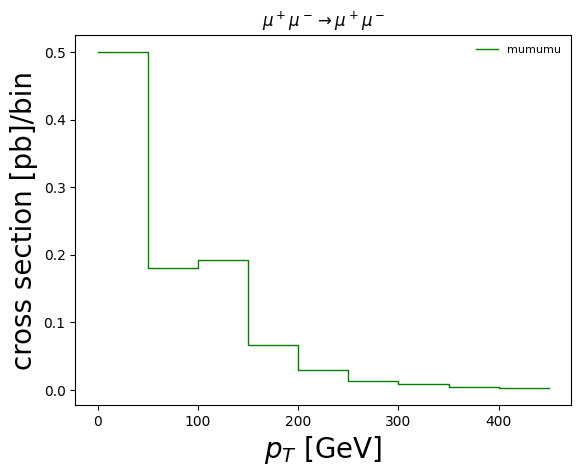

---
plotting minv
saving the figure
output in minv.pdf


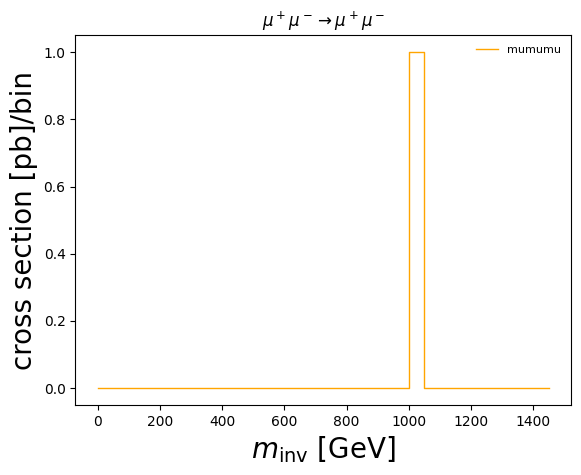

In [3]:
#######################################
# PERFORM THE ANALYSIS AND PLOT HERE:
#######################################

# read the LHE File
print('Reading', inputfile)
events, weights, multiweights = readlhefile(inputfile)
# analyze the events by passing them to the analysis fuinction defined above
output = analyze(events, weights)

# set the cross section:
CrossSection = [1.0]

# plot all the variables in the output dictionary. 
# here as an example we are plotting the muon (or anti-muon) pT
# Note that "histogram_multi" takes as input in DATA_array an array of data points,
# hence the extra [] there and in the plotnames_multi
histogram_multi_xsec([output['pt']], CrossSection, 'pt', ['mumumu'], r'$p_T$ [GeV]', title=r'$\mu^+\mu^- \rightarrow \mu^+ \mu^-$', ylabel='cross section [pb]/bin', custom_bins=np.arange(0,500, 50))

# EXERCISE: replicate the above, replacing 'pt' with 'minv'. Note that the range of the histogram is defined by custom_bins=np.arange(0,500, 50): i.e. a range of 0 to 500 GeV, in bins of 50 GeV. 
histogram_multi_xsec([output['minv']], CrossSection, 'minv', ['mumumu'], r'$m_\mathrm{inv}$ [GeV]', title=r'$\mu^+\mu^- \rightarrow \mu^+ \mu^-$', ylabel='cross section [pb]/bin', custom_bins=np.arange(0,1500, 50))


In [10]:
print(output['minv'])

[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0,